<b> Digit Recognizer <b>

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")

In [2]:
df.shape

(42000, 785)

In [3]:
y_train = df['label']

In [4]:
y_train.shape

(42000,)

In [5]:
x_train = df.drop(['label'],axis=1)

In [6]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
x_train.isnull().values.any()

False

Normalizing and Reshaping the training data

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50, svd_solver='auto')
pca.fit(x_train)
print('variance ration after PCA :')
print(pca.explained_variance_ratio_)
print('singular values after PCA :')
print(pca.singular_values_)

x_train= pca.fit_transform(x_train)
print("shape of x_train after PCA : ", x_train.shape)

variance ration after PCA :
[ 0.09748938  0.07160266  0.06145903  0.05379302  0.04894262  0.04303214
  0.03277051  0.02892103  0.02766902  0.02348871  0.02099325  0.02059001
  0.01702553  0.01692787  0.01581126  0.0148324   0.01319688  0.01282727
  0.01187976  0.01152755  0.01072191  0.01015199  0.00964902  0.00912846
  0.00887641  0.00838766  0.00811856  0.00777406  0.00740635  0.00686661
  0.00657982  0.00638798  0.00599367  0.00588912  0.00564335  0.00540965
  0.00509216  0.00487473  0.00475534  0.0046652   0.00452909  0.00444959
  0.00418122  0.0039727   0.00384237  0.00374824  0.00360591  0.00347523
  0.00335994  0.00318615]
singular values after PCA :
[ 118576.76864452  101621.48813486   94148.59150236   88081.34284631
   84016.49833982   78780.26467234   68748.39258148   64584.43354872
   63171.01859374   58203.69410309   55025.10077984   54494.07177965
   49553.15920576   49410.82714956   47753.39575275   46251.58522966
   43627.12360751   43011.84733355   41392.8017208    4077

In [10]:
x_train = x_train/255.0

x_train = x_train.values.reshape(-1,28,28,1)

In [11]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [12]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train=lb.fit_transform(y_train)

In [13]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [15]:
X_train.shape

(33600, 50)

In [16]:
X_validate.shape

(8400, 50)

In [17]:
y_train.shape

(33600, 10)

In [18]:
y_validate.shape

(8400, 10)

In [19]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(300,150), max_iter=10, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.01)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Validation set score: %f" % mlp.score(X_validate, y_validate))


Iteration 1, loss = 0.50997136
Iteration 2, loss = 0.18812697
Iteration 3, loss = 0.13326229
Iteration 4, loss = 0.10866065
Iteration 5, loss = 0.09462548
Iteration 6, loss = 0.09684530
Iteration 7, loss = 0.07523888
Iteration 8, loss = 0.06526710
Iteration 9, loss = 0.07277739
Iteration 10, loss = 0.05964075


C:\Users\txr5070\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.989851
Validation set score: 0.965833


In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
y_true, y_pred = y_validate, mlp.predict(X_validate)

In [22]:
class_label = lb.classes_.tolist()

In [23]:
print("Classification Report: \n")
print(classification_report(y_true, y_pred))
print("Accuracy Score: \n")
print(accuracy_score(y_true, y_pred))
print()

Classification Report: 

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       813
          1       0.98      0.99      0.99       961
          2       0.98      0.97      0.98       860
          3       0.96      0.97      0.97       863
          4       0.97      0.98      0.98       827
          5       0.98      0.96      0.97       756
          6       0.97      0.98      0.98       841
          7       0.98      0.97      0.97       899
          8       0.99      0.94      0.96       768
          9       0.97      0.96      0.97       812

avg / total       0.98      0.97      0.97      8400

Accuracy Score: 

0.965833333333



In [24]:
#The ROC curve for each class
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
class_size = len(class_label)
for i in range(class_size):
    fpr[i], tpr[i], _ = roc_curve(y_true[:,i], y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


In [25]:
from scipy import interp
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(class_size)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(class_size):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
    
mean_tpr /= class_size
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

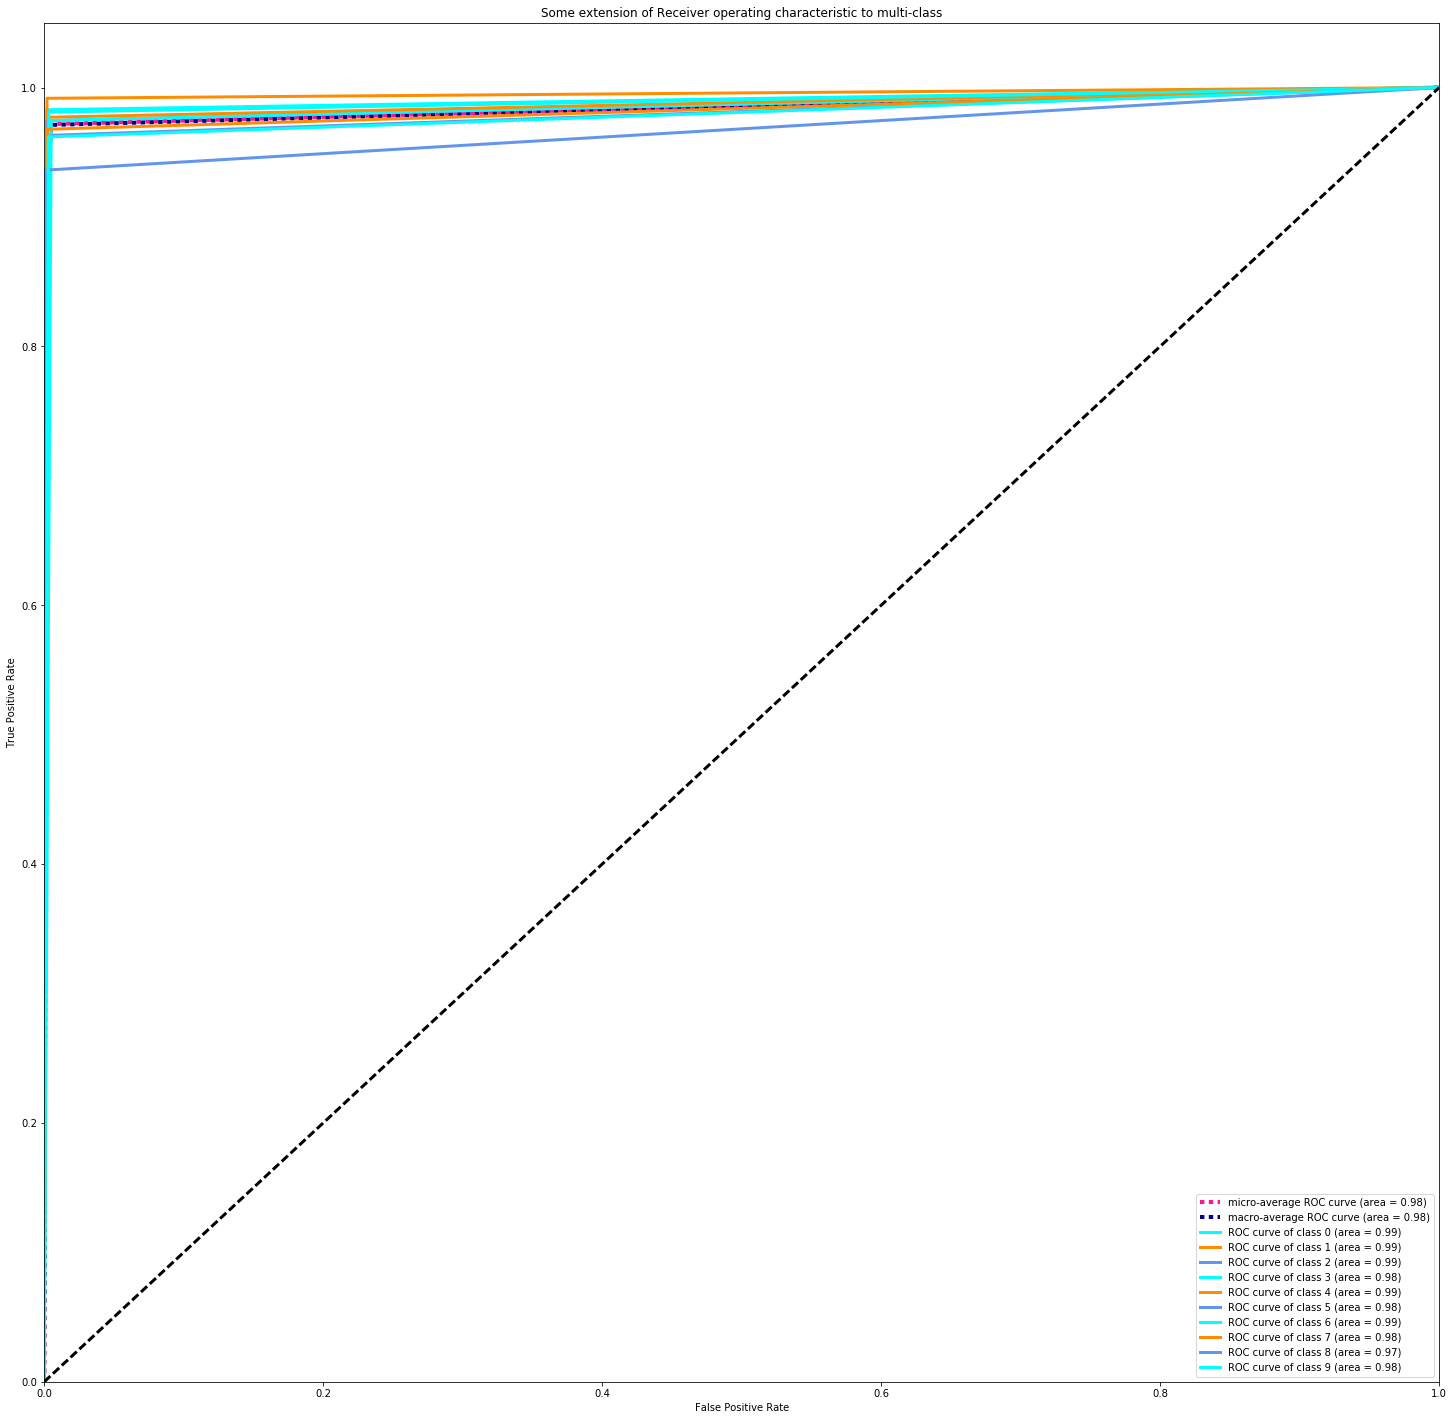

In [26]:
from itertools import cycle
lw=3
plt.figure(figsize=(25,25))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(class_size), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [27]:
#De-encode the y_pred and y_true
y_pred = lb.inverse_transform(y_pred)

In [28]:
y_true = lb.inverse_transform(y_true)

In [29]:
print("Detailed confusion matrix:")
print(confusion_matrix(y_true, y_pred,labels=class_label))

Detailed confusion matrix:
[[800   0   0   0   1   0   7   0   2   3]
 [  3 953   0   1   0   0   1   2   1   0]
 [ 16   0 837   5   0   0   0   2   0   0]
 [  7   2   2 841   0   4   0   2   1   4]
 [  6   3   1   0 808   0   2   2   1   4]
 [ 16   0   1   7   0 726   3   0   2   1]
 [  9   1   0   1   3   5 822   0   0   0]
 [ 14   2   8   3   3   0   0 868   0   1]
 [ 25   7   0   9   1   4   6   1 714   1]
 [ 13   0   1   7  13   1   2   5   0 770]]
